In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [3]:
wine_quality = pd.read_csv('winequality-red.csv')
wine_quality.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wine_quality.shape

(1599, 12)

In [5]:
wine_quality.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

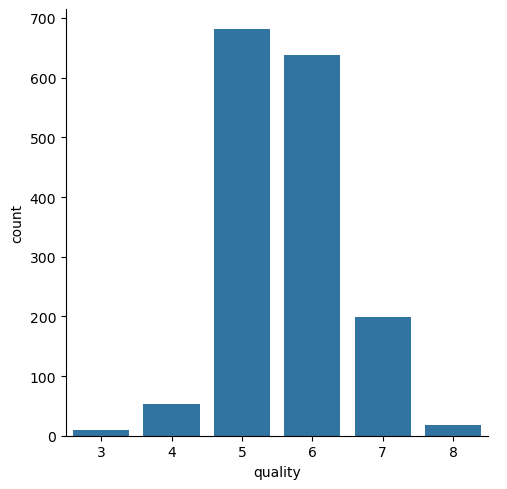

In [7]:
sns.catplot(x = "quality", data = wine_quality, kind = 'count')

<Axes: xlabel='quality', ylabel='volatile acidity'>

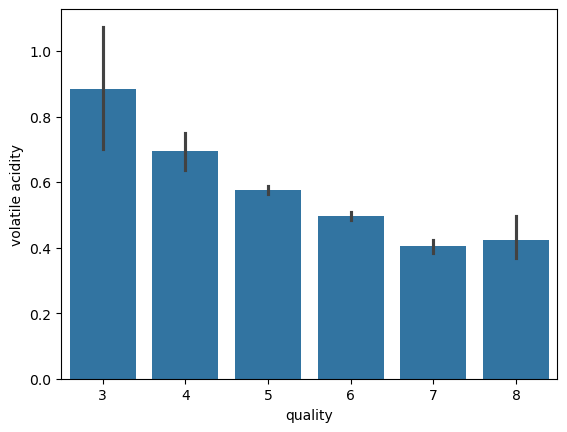

In [11]:
sns.barplot(x = "quality", y = "volatile acidity", data = wine_quality)

<Axes: xlabel='quality', ylabel='citric acid'>

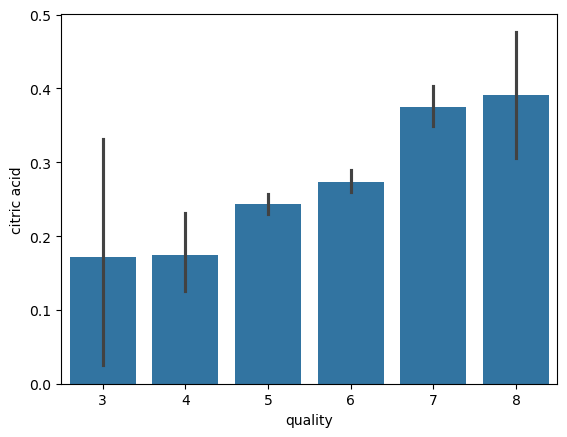

In [12]:
sns.barplot(x = "quality", y = "citric acid", data = wine_quality)

In [13]:
correlation = wine_quality.corr()

<Axes: >

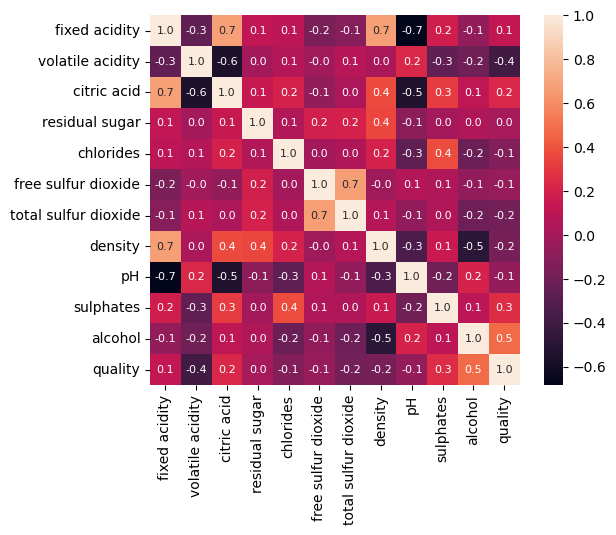

In [17]:
sns.heatmap(correlation, cbar = True, square = True, fmt = '.1f', annot = True, annot_kws = {'size':8})

In [24]:
data = wine_quality.drop(columns = 'quality', axis = 1)
label = wine_quality['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


In [27]:
data_train,data_test,label_train,label_test = train_test_split(data,label,test_size = 0.1,stratify = label, random_state = 2)
print(data.shape,data_train.shape,data_test.shape)
print(label.shape,label_train.shape,label_test.shape)

(1599, 11) (1439, 11) (160, 11)
(1599,) (1439,) (160,)


In [28]:
model = RandomForestClassifier()
model.fit(data_train,label_train)

RandomForestClassifier()

In [32]:
training_prediction = model.predict(data_train)
training_accuracy = accuracy_score(training_prediction,label_train)
print("Accuracy on training data is ", training_accuracy)

testing_prediction = model.predict(data_test)
testing_accuracy = accuracy_score(testing_prediction,label_test)
print("Accuracy on testing data is ", testing_accuracy)

Accuracy on training data is  1.0
Accuracy on testing data is  0.94375
